In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

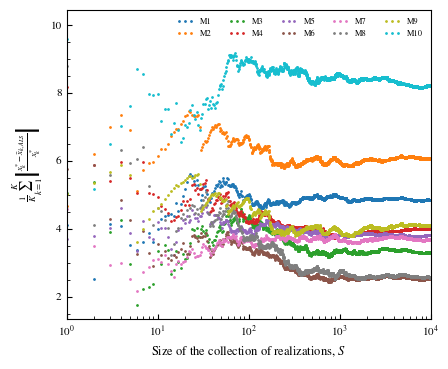

In [23]:
plt.style.use('stylesheet.mpltstyle_collection_size')

fig, ax = plt.subplots(1,1,figsize = (4.3, 3.5))

size_label = 9

folder = '../Results/NGS_J19_DRK/ALS/'
real_results = pd.read_csv('../Data_Base/NGS_J19_DRK/p_NGS_J19_DRK.csv').values[3:,1:4]
for i in range(1,11):
    data = pd.read_csv(folder+'M'+str(i)+'.txt', delimiter = '\t').values[:10000,:3]*100
    true_results = real_results[i-1,:]
    cum1 = np.zeros(data.shape)
    cum1[0,:] = data[0,:]
    for j in range(1, cum1.shape[0]):
        cum1[j,:] = cum1[j-1,:]+data[j,:]
    cum2 = np.zeros(data.shape)
    for j in range(cum1.shape[0]):
        cum2[j,:] = cum1[j,:]/(j+1)
    cum2 = np.mean(abs(cum2 - true_results), axis = 1)
    ax.plot(cum2, '.', label = 'M'+str(i), markersize=2)

ax.set_ylabel(r'$\frac{1}{K}\sum_{k=1}^K\left\vert\frac{x_{k}^{*}-\bar{x}_{k,ALS}}{x_{k}^{*}}\right\vert$', fontsize = size_label)
ax.set_xlabel('Size of the collection of realizations, ' r'$S$', fontsize = size_label)
ax.set_xscale('log')
ax.set_xlim(1,10000)
plt.legend(ncol = 5, loc = 1)
plt.savefig('../Figures/Collection_size.pdf')
plt.show()